In [354]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [206]:
df = pd.read_csv('D:/projet/ODC-World-Cup-2022-Predictions/data/results.csv')


In [207]:
df.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False
43751,2022-06-14,South Korea,Egypt,4,1,Friendly,Seoul,South Korea,False


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43752 entries, 0 to 43751
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43752 non-null  object
 1   home_team   43752 non-null  object
 2   away_team   43752 non-null  object
 3   home_score  43752 non-null  int64 
 4   away_score  43752 non-null  int64 
 5   tournament  43752 non-null  object
 6   city        43752 non-null  object
 7   country     43752 non-null  object
 8   neutral     43752 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [209]:
df.date.min()

'1872-11-30'

In [210]:
df.date.max()

'2022-06-14'

In [211]:
df.home_team.unique()

array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Czechoslovakia',
       'Switzerland', 'Sweden', 'Germany', 'Italy', 'Chile', 'Norway',
       'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Catalonia',
       'Basque Country', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Brittany',
       'Poland', 'Yugoslavia', 'New Zealand', 'Romania', 'Latvia',
       'Galicia', 'Portugal', 'Andalusia', 'China PR', 'Australia',
       'Lithuania', 'Turkey', 'Central Spain', 'Mexico', 'Aruba', 'Egypt',
       'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia',
       'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Republic of Ireland', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Dominica', 'Silesia', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guiana', 'Cuba', 

In [212]:
len(df.home_team.unique())

306

In [213]:
df.query('away_team=="Morocco"')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
4851,1960-11-13,Tunisia,Morocco,2,1,FIFA World Cup qualification,Tunis,Tunisia,False
4905,1961-04-02,Ghana,Morocco,0,0,FIFA World Cup qualification,Accra,Ghana,False
4962,1961-06-18,Yugoslavia,Morocco,3,2,Friendly,Belgrade,Yugoslavia,False
4964,1961-06-21,German DR,Morocco,1,2,Friendly,Erfurt,German DR,False
5053,1961-11-23,Spain,Morocco,3,2,FIFA World Cup qualification,Madrid,Spain,False
...,...,...,...,...,...,...,...,...,...
43132,2021-12-04,Jordan,Morocco,0,4,Arab Cup,Al Rayyan,Qatar,True
43198,2022-01-18,Gabon,Morocco,2,2,African Cup of Nations,Yaoundé,Cameroon,True
43244,2022-01-30,Egypt,Morocco,2,1,African Cup of Nations,Yaoundé,Cameroon,True
43327,2022-03-25,DR Congo,Morocco,1,1,FIFA World Cup qualification,Kinshasa,DR Congo,False


In [214]:
df.groupby(['home_team']).agg({'date':'count'}).reset_index().sort_values(by='date', ascending=False)

,home_team,date
35,Brazil,589
12,Argentina,564
168,Mexico,543
99,Germany,524
80,England,520
...,...,...
51,Central Spain,1
217,Romani people,1
232,Sark,1
54,Chameria,1


In [215]:
df.groupby(['away_team']).agg({'date':'count'}).reset_index().sort_values(by='date', ascending=False).head(20)

,away_team,date
281,Uruguay,556
252,Sweden,545
81,England,522
119,Hungary,489
201,Paraguay,471
100,Germany,456
12,Argentina,447
205,Poland,445
299,Zambia,435
91,Finland,430


In [216]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='home_score', ylabel='Count'>

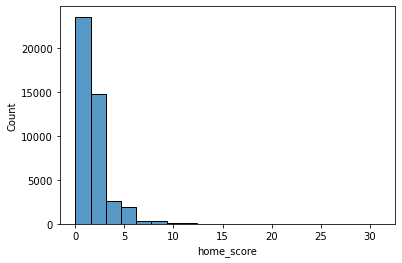

In [218]:
sns.histplot(x='home_score', data=df, bins=20)

<AxesSubplot:xlabel='away_score', ylabel='Count'>

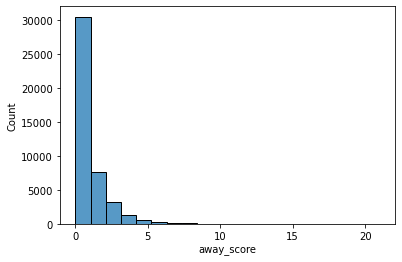

In [219]:
sns.histplot(x='away_score', data=df, bins=20)

In [220]:
df.sort_values(by='home_score', ascending=False).head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
23969,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
8010,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False
11111,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False
23966,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
29005,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True
6140,1966-04-03,Libya,Oman,21,0,Arab Cup,Baghdad,Iraq,True
22740,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False
23628,2000-11-24,Iran,Guam,19,0,FIFA World Cup qualification,Tabriz,Iran,False
25862,2003-06-29,Gibraltar,Sark,19,0,Island Games,St. Martin,Guernsey,True
22653,2000-01-26,China PR,Guam,19,0,AFC Asian Cup qualification,Hanoi,Vietnam,True


<AxesSubplot:ylabel='Density'>

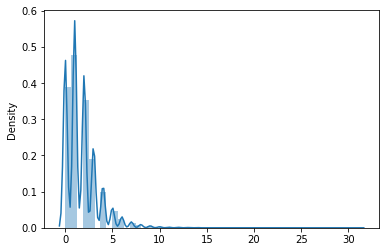

In [221]:
sns.distplot(x=df['home_score'])

<AxesSubplot:xlabel='home_score', ylabel='Density'>

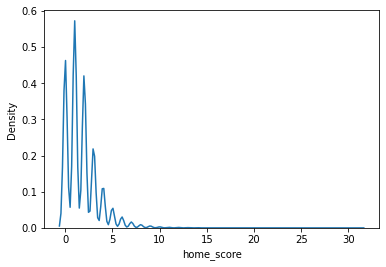

In [222]:
sns.kdeplot(x='home_score', data=df)

<AxesSubplot:xlabel='home_score', ylabel='count'>

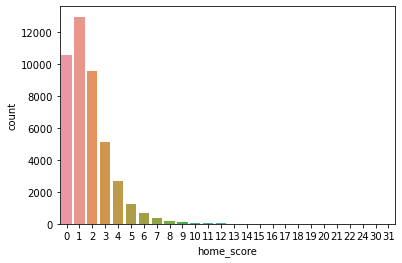

In [223]:
sns.countplot(x='home_score', data=df)

In [224]:
from scipy.stats import poisson

In [225]:
poisson.pmf(3, 1.1)

0.07384190206702398

In [226]:
def winner(home_score, away_score):
    if home_score > away_score:
        return 'home_win'
    elif home_score < away_score:
        return 'home_lose'        
    else:
        return 'draw'
    
df['winner'] = df.apply(lambda x: winner(x.home_score, x.away_score), axis=1)

In [227]:
df.groupby(['winner']).agg({'date':'count'})

,date
winner,
draw,10084
home_lose,12376
home_win,21292


In [228]:
predictors = ['home_team', 'away_team']

X = pd.get_dummies(df[predictors])
y = df['winner']

In [229]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=7)

model.fit(X, y)

RandomForestClassifier(max_depth=7)

In [230]:
from sklearn.metrics import classification_report

print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

        draw       0.00      0.00      0.00     10084
   home_lose       0.88      0.02      0.04     12376
    home_win       0.49      1.00      0.66     21292

    accuracy                           0.49     43752
   macro avg       0.46      0.34      0.23     43752
weighted avg       0.49      0.49      0.33     43752



In [231]:
precision = .81
recall = .02

In [232]:
1 / (((1/precision) + (1/recall))/2)

0.03903614457831325

In [233]:
2 / (1/precision + 1/recall)

0.03903614457831325

In [234]:
X.query('home_team_Morocco==1 and away_team_England==1')

,home_team_Abkhazia,home_team_Afghanistan,home_team_Albania,home_team_Alderney,home_team_Algeria,home_team_American Samoa,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Arameans Suryoye,home_team_Argentina,home_team_Armenia,home_team_Artsakh,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barawa,home_team_Barbados,home_team_Basque Country,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bonaire,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Brittany,home_team_Brunei,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Canary Islands,home_team_Cape Verde,home_team_Cascadia,home_team_Catalonia,home_team_Cayman Islands,home_team_Central African Republic,home_team_Central Spain,home_team_Chad,home_team_Chagos Islands,home_team_Chameria,home_team_Chile,home_team_China PR,home_team_Colombia,home_team_Comoros,home_team_Congo,home_team_Cook Islands,home_team_Corsica,home_team_Costa Rica,home_team_County of Nice,home_team_Croatia,home_team_Cuba,home_team_Curaçao,home_team_Cyprus,home_team_Czech Republic,home_team_Czechoslovakia,home_team_DR Congo,home_team_Darfur,home_team_Denmark,home_team_Djibouti,home_team_Dominica,home_team_Dominican Republic,home_team_Ecuador,home_team_Egypt,home_team_El Salvador,home_team_Ellan Vannin,home_team_England,home_team_Equatorial Guinea,home_team_Eritrea,home_team_Estonia,home_team_Eswatini,home_team_Ethiopia,home_team_Falkland Islands,home_team_Faroe Islands,home_team_Felvidék,home_team_Fiji,home_team_Finland,home_team_France,home_team_French Guiana,home_team_Frøya,home_team_Gabon,home_team_Galicia,home_team_Gambia,home_team_Georgia,home_team_German DR,home_team_Germany,home_team_Ghana,home_team_Gibraltar,home_team_Gotland,home_team_Gozo,home_team_Greece,home_team_Greenland,home_team_Grenada,home_team_Guadeloupe,home_team_Guam,home_team_Guatemala,home_team_Guernsey,home_team_Guinea,home_team_Guinea-Bissau,home_team_Guyana,home_team_Găgăuzia,home_team_Haiti,home_team_Hitra,home_team_Honduras,home_team_Hong Kong,home_team_Hungary,home_team_Iceland,home_team_India,home_team_Indonesia,home_team_Iran,home_team_Iraq,home_team_Iraqi Kurdistan,home_team_Isle of Man,home_team_Isle of Wight,home_team_Israel,home_team_Italy,home_team_Ivory Coast,home_team_Jamaica,home_team_Japan,home_team_Jersey,home_team_Jordan,home_team_Kabylia,home_team_Kazakhstan,home_team_Kenya,home_team_Kernow,home_team_Kiribati,home_team_Kosovo,home_team_Kuwait,home_team_Kyrgyzstan,home_team_Kárpátalja,home_team_Laos,home_team_Latvia,home_team_Lebanon,home_team_Lesotho,home_team_Liberia,home_team_Libya,home_team_Liechtenstein,home_team_Lithuania,home_team_Luxembourg,home_team_Macau,home_team_Madagascar,home_team_Madrid,home_team_Malawi,home_team_Malaysia,home_team_Maldives,home_team_Mali,home_team_Malta,home_team_Manchukuo,home_team_Martinique,home_team_Matabeleland,home_team_Mauritania,home_team_Mauritius,home_team_Mayotte,home_team_Menorca,home_team_Mexico,home_team_Micronesia,home_team_Moldova,home_team_Monaco,home_team_Mongolia,home_team_Montenegro,home_team_Montserrat,home_team_Morocco,home_team_Mozambique,home_team_Myanmar,home_team_Namibia,home_team_Nepal,home_team_Netherlands,home_team_New Caledonia,home_team_New Zealand,home_team_Nicaragua,home_team_Niger,home_team_Nigeria,home_team_Niue,home_team_North Korea,home_team_North Macedonia,home_team_North Vietnam,home_team_Northern Cyprus,home_team_Northern Ireland,home_team_Northern Mariana Islands,home_team_Norway,home_team_Occitania,home_team_Oman,home_team_Orkney,home_team_Padania,home_team_Pakistan,home_team_Palau,home_team_Palestine,home_team_Panama,home_team_Panjab,home_team_Papua New Guinea,home_team_Par

In [235]:
model.predict_proba(X.iloc[[21435]])

array([[0.23604578, 0.33306185, 0.43089237]])

In [236]:
X.query('away_team_Morocco==1 and home_team_England==1')

,home_team_Abkhazia,home_team_Afghanistan,home_team_Albania,home_team_Alderney,home_team_Algeria,home_team_American Samoa,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Arameans Suryoye,home_team_Argentina,home_team_Armenia,home_team_Artsakh,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barawa,home_team_Barbados,home_team_Basque Country,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bonaire,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Brittany,home_team_Brunei,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Canary Islands,home_team_Cape Verde,home_team_Cascadia,home_team_Catalonia,home_team_Cayman Islands,home_team_Central African Republic,home_team_Central Spain,home_team_Chad,home_team_Chagos Islands,home_team_Chameria,home_team_Chile,home_team_China PR,home_team_Colombia,home_team_Comoros,home_team_Congo,home_team_Cook Islands,home_team_Corsica,home_team_Costa Rica,home_team_County of Nice,home_team_Croatia,home_team_Cuba,home_team_Curaçao,home_team_Cyprus,home_team_Czech Republic,home_team_Czechoslovakia,home_team_DR Congo,home_team_Darfur,home_team_Denmark,home_team_Djibouti,home_team_Dominica,home_team_Dominican Republic,home_team_Ecuador,home_team_Egypt,home_team_El Salvador,home_team_Ellan Vannin,home_team_England,home_team_Equatorial Guinea,home_team_Eritrea,home_team_Estonia,home_team_Eswatini,home_team_Ethiopia,home_team_Falkland Islands,home_team_Faroe Islands,home_team_Felvidék,home_team_Fiji,home_team_Finland,home_team_France,home_team_French Guiana,home_team_Frøya,home_team_Gabon,home_team_Galicia,home_team_Gambia,home_team_Georgia,home_team_German DR,home_team_Germany,home_team_Ghana,home_team_Gibraltar,home_team_Gotland,home_team_Gozo,home_team_Greece,home_team_Greenland,home_team_Grenada,home_team_Guadeloupe,home_team_Guam,home_team_Guatemala,home_team_Guernsey,home_team_Guinea,home_team_Guinea-Bissau,home_team_Guyana,home_team_Găgăuzia,home_team_Haiti,home_team_Hitra,home_team_Honduras,home_team_Hong Kong,home_team_Hungary,home_team_Iceland,home_team_India,home_team_Indonesia,home_team_Iran,home_team_Iraq,home_team_Iraqi Kurdistan,home_team_Isle of Man,home_team_Isle of Wight,home_team_Israel,home_team_Italy,home_team_Ivory Coast,home_team_Jamaica,home_team_Japan,home_team_Jersey,home_team_Jordan,home_team_Kabylia,home_team_Kazakhstan,home_team_Kenya,home_team_Kernow,home_team_Kiribati,home_team_Kosovo,home_team_Kuwait,home_team_Kyrgyzstan,home_team_Kárpátalja,home_team_Laos,home_team_Latvia,home_team_Lebanon,home_team_Lesotho,home_team_Liberia,home_team_Libya,home_team_Liechtenstein,home_team_Lithuania,home_team_Luxembourg,home_team_Macau,home_team_Madagascar,home_team_Madrid,home_team_Malawi,home_team_Malaysia,home_team_Maldives,home_team_Mali,home_team_Malta,home_team_Manchukuo,home_team_Martinique,home_team_Matabeleland,home_team_Mauritania,home_team_Mauritius,home_team_Mayotte,home_team_Menorca,home_team_Mexico,home_team_Micronesia,home_team_Moldova,home_team_Monaco,home_team_Mongolia,home_team_Montenegro,home_team_Montserrat,home_team_Morocco,home_team_Mozambique,home_team_Myanmar,home_team_Namibia,home_team_Nepal,home_team_Netherlands,home_team_New Caledonia,home_team_New Zealand,home_team_Nicaragua,home_team_Niger,home_team_Nigeria,home_team_Niue,home_team_North Korea,home_team_North Macedonia,home_team_North Vietnam,home_team_Northern Cyprus,home_team_Northern Ireland,home_team_Northern Mariana Islands,home_team_Norway,home_team_Occitania,home_team_Oman,home_team_Orkney,home_team_Padania,home_team_Pakistan,home_team_Palau,home_team_Palestine,home_team_Panama,home_team_Panjab,home_team_Papua New Guinea,home_team_Par

In [237]:
model.predict_proba(X.iloc[[14385]])

array([[0.23743206, 0.26158297, 0.50098497]])

In [238]:
x_pred = pd.get_dummies(pd.DataFrame({'home_team':['Morocco'], 'away_team':['England']}))

In [239]:
import warnings
warnings.filterwarnings('ignore')

for col in X.columns:
    if col not in x_pred.columns:
        x_pred[col] = 0

In [240]:
model.predict_proba(x_pred[X.columns])

array([[0.23604578, 0.33306185, 0.43089237]])

In [521]:
fr = pd.read_csv('D:/projet/ODC-World-Cup-2022-Predictions/data/fifa_ranking.csv')

In [242]:
fr.rank_date.max()

'2022-10-06'

In [243]:
df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,home_win


In [244]:
df['year'] = df.apply(lambda x: x.date[:4], axis=1)
df['month'] = df.apply(lambda x: x.date[5:7], axis=1)

In [245]:
fr['year'] = fr.apply(lambda x: x.rank_date[:4], axis=1)
fr['month'] = fr.apply(lambda x: x.rank_date[5:7], axis=1)

In [246]:
df.groupby('month').agg({'date':['min', 'max']})

date            
              min         max
month                        
01     1879-01-18  2022-01-30
02     1881-02-26  2022-02-06
03     1873-03-08  2022-03-30
04     1879-04-05  2022-04-27
05     1902-05-03  2022-05-31
06     1903-06-11  2022-06-14
07     1902-07-20  2021-07-29
08     1905-08-15  2021-08-29
09     1888-09-19  2021-09-30
10     1902-10-12  2021-10-27
11     1872-11-30  2021-11-30
12     1911-12-17  2021-12-31

In [247]:
fr.query('country_full=="Morocco"')

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month
135,41,Morocco,MAR,32.00,0.00,0,CAF,1992-12-31,1992,12
237,33,Morocco,MAR,40.00,32.00,-8,CAF,1993-08-08,1993,08
388,32,Morocco,MAR,42.00,40.00,-1,CAF,1993-09-23,1993,09
481,30,Morocco,MAR,43.00,42.00,-2,CAF,1993-10-22,1993,10
688,30,Morocco,MAR,44.00,43.00,0,CAF,1993-11-19,1993,11
...,...,...,...,...,...,...,...,...,...,...
62939,24,Morocco,MAR,1547.42,1529.93,-4,CAF,2022-02-10,2022,02
63225,24,Morocco,MAR,1551.88,1547.42,0,CAF,2022-03-31,2022,03
63340,22,Morocco,MAR,1558.90,1551.88,-2,CAF,2022-06-23,2022,06
63648,23,Morocco,MAR,1558.35,1558.90,1,CAF,2022-08-25,2022,08


<AxesSubplot:xlabel='rank_date', ylabel='rank'>

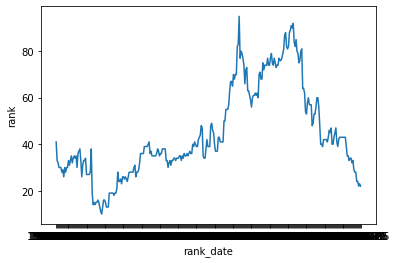

In [248]:
sns.lineplot(x='rank_date', y='rank', data=fr.query('country_full=="Morocco"'))


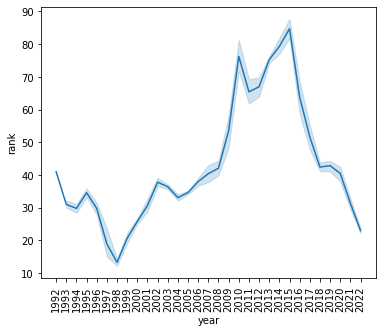

In [249]:
plt.figure(figsize=(6, 5))
sns.lineplot(x='year', y='rank', data=fr.query('country_full=="Morocco"'))
plt.xticks(rotation=90)
plt.show()

In [250]:
fr['rank'].max()

211

In [251]:
fr.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date', 'year',
       'month'],
      dtype='object')

In [252]:
fr.query('total_points>0')

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month
0,1,Germany,GER,57.00,0.00,0,UEFA,1992-12-31,1992,12
1,96,Syria,SYR,11.00,0.00,0,AFC,1992-12-31,1992,12
2,97,Burkina Faso,BFA,11.00,0.00,0,CAF,1992-12-31,1992,12
3,99,Latvia,LVA,10.00,0.00,0,UEFA,1992-12-31,1992,12
4,100,Burundi,BDI,10.00,0.00,0,CAF,1992-12-31,1992,12
...,...,...,...,...,...,...,...,...,...,...
63911,74,El Salvador,SLV,1330.51,1333.48,3,CONCACAF,2022-10-06,2022,10
63912,75,Oman,OMA,1320.29,1323.03,0,AFC,2022-10-06,2022,10
63913,76,Israel,ISR,1316.55,1316.35,0,UEFA,2022-10-06,2022,10
63914,78,Georgia,GEO,1307.34,1296.46,-4,UEFA,2022-10-06,2022,10


In [253]:
fr.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date', 'year',
       'month'],
      dtype='object')

In [254]:
data = df.merge(fr, left_on=['home_team', 'year', 'month'], 
                right_on=['country_full', 'year', 'month'], 
               suffixes=('', '__home'))

In [255]:

pd.set_option("display.max_columns", None)

In [256]:
data.head(500).tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
497,1994-10-09,Zambia,Malawi,2,1,Friendly,Lusaka,Zambia,False,home_win,1994,10,20,Zambia,ZAM,50.0,49.0,-1,CAF,1994-10-25
498,1994-10-12,Austria,Northern Ireland,1,2,UEFA Euro qualification,Vienna,Austria,False,home_lose,1994,10,41,Austria,AUT,38.0,38.0,1,UEFA,1994-10-25
499,1994-10-12,Belarus,Luxembourg,2,0,UEFA Euro qualification,Minsk,Belarus,False,home_win,1994,10,121,Belarus,BLR,11.0,8.0,-9,UEFA,1994-10-25


In [257]:
data = data.merge(fr, left_on=['away_team', 'year', 'month'], 
                right_on=['country_full', 'year', 'month'], 
               suffixes=('', '__away'))

In [258]:
data.head(500).tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,rank__away,country_full__away,country_abrv__away,total_points__away,previous_points__away,rank_change__away,confederation__away,rank_date__away
497,1994-11-10,Saudi Arabia,Bahrain,3,1,Gulf Cup,Abu Dhabi,United Arab Emirates,True,home_win,1994,11,27,Saudi Arabia,KSA,45.0,44.0,0,AFC,1994-11-22,71,Bahrain,BHR,26.0,21.0,-13,AFC,1994-11-22
498,1994-11-16,United Arab Emirates,Oman,2,0,Gulf Cup,Abu Dhabi,United Arab Emirates,False,home_win,1994,11,47,United Arab Emirates,UAE,36.0,33.0,-7,AFC,1994-11-22,72,Oman,OMA,25.0,27.0,7,AFC,1994-11-22
499,1994-11-09,Qatar,Oman,4,2,Gulf Cup,Abu Dhabi,United Arab Emirates,True,home_win,1994,11,60,Qatar,QAT,31.0,29.0,0,AFC,1994-11-22,72,Oman,OMA,25.0,27.0,7,AFC,1994-11-22


In [259]:
fr.query('year=="2022" and month=="08"').sort_values(by='rank', ascending=True)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month
63494,1,Brazil,BRA,1837.56,1837.56,0,CONMEBOL,2022-08-25,2022,08
63495,2,Belgium,BEL,1821.92,1821.92,0,UEFA,2022-08-25,2022,08
63653,3,Argentina,ARG,1770.65,1770.65,0,CONMEBOL,2022-08-25,2022,08
63629,4,France,FRA,1764.85,1764.85,0,UEFA,2022-08-25,2022,08
63630,5,England,ENG,1737.46,1737.46,0,UEFA,2022-08-25,2022,08
...,...,...,...,...,...,...,...,...,...,...
63566,207,Sri Lanka,SRI,825.25,825.25,0,AFC,2022-08-25,2022,08
63567,208,US Virgin Islands,VIR,823.97,823.97,0,CONCACAF,2022-08-25,2022,08
63568,209,British Virgin Islands,VGB,809.32,809.32,0,CONCACAF,2022-08-25,2022,08
63569,210,Anguilla,AIA,790.74,790.74,0,CONCACAF,2022-08-25,2022,08


<AxesSubplot:xlabel='rank'>

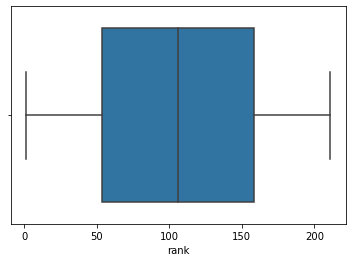

In [260]:
sns.boxplot(x='rank', data=fr.query('year=="2022" and month=="08"').sort_values(by='rank', ascending=True))

<AxesSubplot:xlabel='total_points', ylabel='Count'>

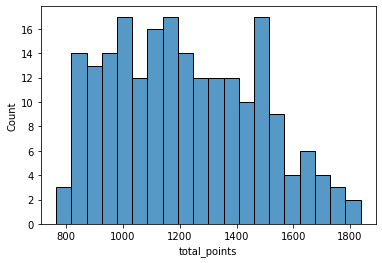

In [261]:
sns.histplot(x='total_points', data=fr.query('year=="2022" and month=="08"').sort_values(by='rank', ascending=True), bins=20)

In [262]:
data['home_tier'] = ''
data.loc[data['rank'] > 32, 'home_tier'] = 'bronze'
data.loc[data['rank'] <= 32, 'home_tier'] = 'silver'
data.loc[data['rank'] <= 16, 'home_tier'] = 'gold'
data.loc[data['rank'] <= 8, 'home_tier'] = 'diamond'

In [263]:
data['away_tier'] = ''
data.loc[data['rank__away'] > 32, 'away_tier'] = 'bronze'
data.loc[data['rank__away'] <= 32, 'away_tier'] = 'silver'
data.loc[data['rank__away'] <= 16, 'away_tier'] = 'gold'
data.loc[data['rank__away'] <= 8, 'away_tier'] = 'diamond'

In [264]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'winner', 'year', 'month',
       'rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date',
       'rank__away', 'country_full__away', 'country_abrv__away',
       'total_points__away', 'previous_points__away', 'rank_change__away',
       'confederation__away', 'rank_date__away', 'home_tier', 'away_tier'],
      dtype='object')

In [265]:
data.groupby(['home_tier', 'winner']).agg({'date':'count'})

date
home_tier winner         
bronze    draw       3624
          home_lose  4560
          home_win   6393
diamond   draw        275
          home_lose   188
          home_win    922
gold      draw        263
          home_lose   206
          home_win    702
silver    draw        483
          home_lose   425
          home_win   1258

In [266]:
data['home_win'] = (data['winner'] == 'home_win').astype(int)

<AxesSubplot:xlabel='home_tier', ylabel='home_win'>

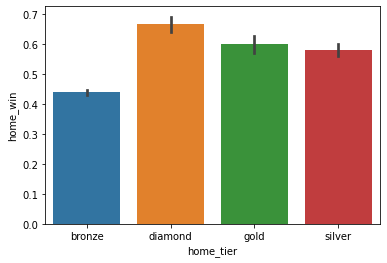

In [267]:
sns.barplot(x='home_tier', y='home_win', data=data)

In [268]:
#df.tournament.unique()

tournaments = ['Copa América', 'FIFA World Cup', 'FIFA World Cup qualification', 'International Cup'
              , 'AFC Asian Cup qualification', 'AFC Asian Cup', 'African Cup of Nations'
              , 'UEFA Euro qualification', 'UEFA Euro', 'African Cup of Nations qualification'
              , 'CONCACAF Championship', 'CONCACAF Championship qualification' 
              , 'CONMEBOL–UEFA Cup of Champions', 'Confederations Cup'
              , 'Oceania Nations Cup qualification','Copa América qualification'
              , 'UEFA Nations League', 'CONCACAF Nations League qualification'
              , 'CONCACAF Nations League','AFF Championship qualification']

In [269]:
df.loc[df.tournament.isin(tournaments), ].groupby('neutral').agg({'date':'count'})

,date
neutral,
False,13654
True,3761


In [270]:
data.query('winner!="draw" and neutral==True').groupby(['home_tier', 'away_tier']).agg({'home_win':['count', 'mean']})

home_win          
                       count      mean
home_tier away_tier                   
bronze    bronze        2260  0.546903
          diamond         65  0.076923
          gold            48  0.104167
          silver         181  0.303867
diamond   bronze         107  0.878505
          diamond         70  0.528571
          gold            52  0.673077
          silver          66  0.712121
gold      bronze          80  0.812500
          diamond         42  0.333333
          gold            27  0.592593
          silver          36  0.611111
silver    bronze         214  0.799065
          diamond         31  0.161290
          gold            26  0.230769
          silver          69  0.492754

In [271]:
data['marginal_effect'] = (data['total_points'] - data['total_points__away']) / data['total_points__away']

<AxesSubplot:xlabel='marginal_effect'>

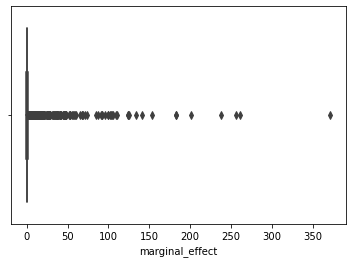

In [272]:
sns.boxplot(x='marginal_effect', data=data)

<AxesSubplot:xlabel='winner', ylabel='marginal_effect'>

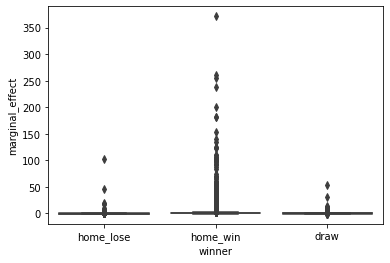

In [273]:
sns.boxplot(x='winner', y='marginal_effect', data=data)

<AxesSubplot:xlabel='marginal_effect', ylabel='Density'>

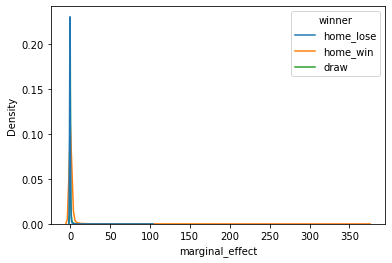

In [274]:
sns.kdeplot(x='marginal_effect', hue='winner', data=data)

In [275]:
data['effect_tier'] = ''
data.loc[data.marginal_effect < -.37, 'effect_tier'] = 'low'
data.loc[data.marginal_effect >= -.37, 'effect_tier'] = 'medium'
data.loc[data.marginal_effect >= -.20, 'effect_tier'] = 'high'
data.loc[data.marginal_effect >= .25, 'effect_tier'] = 'very_high'

In [276]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,rank__away,country_full__away,country_abrv__away,total_points__away,previous_points__away,rank_change__away,confederation__away,rank_date__away,home_tier,away_tier,home_win,marginal_effect,effect_tier
0,1992-12-01,Saudi Arabia,United Arab Emirates,0,1,Gulf Cup,Doha,Qatar,True,home_lose,1992,12,48,Saudi Arabia,KSA,28.0,0.0,0,AFC,1992-12-31,59,United Arab Emirates,UAE,25.0,0.0,0,AFC,1992-12-31,bronze,bronze,0,0.120000,high
1,1992-12-06,Qatar,United Arab Emirates,1,0,Gulf Cup,Doha,Qatar,False,home_win,1992,12,52,Qatar,QAT,27.0,0.0,0,AFC,1992-12-31,59,United Arab Emirates,UAE,25.0,0.0,0,AFC,1992-12-31,bronze,bronze,1,0.080000,high
2,1992-12-04,Bahrain,United Arab Emirates,0,2,Gulf Cup,Doha,Qatar,True,home_lose,1992,12,88,Bahrain,BHR,13.0,0.0,0,AFC,1992-12-31,59,United Arab Emirates,UAE,25.0,0.0,0,AFC,1992-12-31,bronze,bronze,0,-0.480000,low
3,1992-12-09,Oman,United Arab Emirates,0,1,Gulf Cup,Doha,Qatar,True,home_lose,1992,12,116,Oman,OMA,6.0,0.0,0,AFC,1992-12-31,59,United Arab Emirates,UAE,25.0,0.0,0,AFC,1992-12-31,bronze,bronze,0,-0.760000,low
4,1992-12-01,Qatar,Bahrain,1,0,Gulf Cup,Doha,Qatar,False,home_win,1992,12,52,Qatar,QAT,27.0,0.0,0,AFC,1992-12-31,88,Bahrain,BHR,13.0,0.0,0,AFC,1992-12-31,bronze,bronze,1,1.076923,very_high


In [277]:
data['match_importance'] = np.exp((data['year'].astype(int) - 2022)/8)

<AxesSubplot:xlabel='match_importance'>

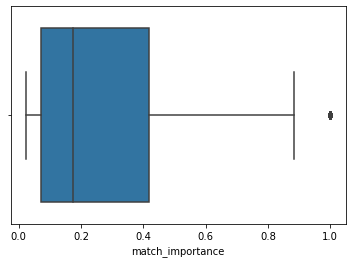

In [278]:
sns.boxplot(x='match_importance', data=data)

In [279]:
data.sort_values(by='match_importance', ascending=False)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,rank__away,country_full__away,country_abrv__away,total_points__away,previous_points__away,rank_change__away,confederation__away,rank_date__away,home_tier,away_tier,home_win,marginal_effect,effect_tier,match_importance
19298,2022-06-13,Sierra Leone,Guinea-Bissau,2,2,African Cup of Nations qualification,Conakry,Guinea,True,draw,2022,06,113,Sierra Leone,SLE,1168.21,1173.89,5,CAF,2022-06-23,115,Guinea-Bissau,GNB,1165.78,1158.62,0,CAF,2022-06-23,bronze,bronze,0,0.002084,high,1.000000
19091,2022-06-02,Estonia,San Marino,2,0,UEFA Nations League,Tallinn,Estonia,False,home_win,2022,06,109,Estonia,EST,1177.40,1169.06,-1,UEFA,2022-06-23,211,San Marino,SMR,763.82,776.97,0,UEFA,2022-06-23,bronze,bronze,1,0.541463,very_high,1.000000
19015,2022-03-29,Qatar,Slovenia,0,0,Friendly,Al Rayyan,Qatar,False,draw,2022,03,51,Qatar,QAT,1441.41,1437.91,-1,AFC,2022-03-31,65,Slovenia,SVN,1378.23,1375.42,1,UEFA,2022-03-31,bronze,bronze,0,0.045841,high,1.000000
19016,2022-03-29,Croatia,Bulgaria,2,1,Friendly,Al Rayyan,Qatar,True,home_win,2022,03,16,Croatia,CRO,1621.11,1620.74,1,UEFA,2022-03-31,73,Bulgaria,BUL,1338.78,1345.47,2,UEFA,2022-03-31,gold,bronze,1,0.210886,high,1.000000
19017,2022-03-26,Qatar,Bulgaria,2,1,Friendly,Al Rayyan,Qatar,False,home_win,2022,03,51,Qatar,QAT,1441.41,1437.91,-1,AFC,2022-03-31,73,Bulgaria,BUL,1338.78,1345.47,2,UEFA,2022-03-31,bronze,bronze,1,0.076659,high,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,1992-12-16,Spain,Latvia,5,0,FIFA World Cup qualification,Seville,Spain,False,home_win,1992,12,15,Spain,ESP,49.00,0.00,0,UEFA,1992-12-31,99,Latvia,LVA,10.00,0.00,0,UEFA,1992-12-31,gold,bronze,1,3.900000,very_high,0.023518
23,1992-12-20,Guinea,Kenya,4,0,FIFA World Cup qualification,Conakry,Guinea,False,home_win,1992,12,63,Guinea,GUI,24.00,0.00,0,CAF,1992-12-31,76,Kenya,KEN,17.00,0.00,0,CAF,1992-12-31,bronze,bronze,1,0.411765,very_high,0.023518
22,1992-12-16,Guinea,Sierra Leone,0,0,Friendly,Conakry,Guinea,False,draw,1992,12,63,Guinea,GUI,24.00,0.00,0,CAF,1992-12-31,79,Sierra Leone,SLE,16.00,0.00,0,CAF,1992-12-31,bronze,bronze,0,0.500000,very_high,0.023518
21,1992-12-20,Uruguay,Germany,1,4,Friendly,Montevideo,Uruguay,False,home_lose,1992,12,16,Uruguay,URU,48.00,0.00,0,CONMEBOL,1992-12-31,1,Germany,GER,57.00,0.00,0,UEFA,1992-12-31,gold,diamond,0,-0.157895,high,0.023518


<AxesSubplot:xlabel='month', ylabel='home_win'>

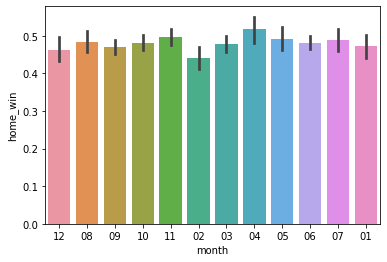

In [280]:
sns.barplot(x='month', y='home_win', data=data)

In [281]:
data.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,rank__away,country_full__away,country_abrv__away,total_points__away,previous_points__away,rank_change__away,confederation__away,rank_date__away,home_tier,away_tier,home_win,marginal_effect,effect_tier,match_importance
0,1992-12-01,Saudi Arabia,United Arab Emirates,0,1,Gulf Cup,Doha,Qatar,True,home_lose,1992,12,48,Saudi Arabia,KSA,28.0,0.0,0,AFC,1992-12-31,59,United Arab Emirates,UAE,25.0,0.0,0,AFC,1992-12-31,bronze,bronze,0,0.12,high,0.023518
1,1992-12-06,Qatar,United Arab Emirates,1,0,Gulf Cup,Doha,Qatar,False,home_win,1992,12,52,Qatar,QAT,27.0,0.0,0,AFC,1992-12-31,59,United Arab Emirates,UAE,25.0,0.0,0,AFC,1992-12-31,bronze,bronze,1,0.08,high,0.023518
2,1992-12-04,Bahrain,United Arab Emirates,0,2,Gulf Cup,Doha,Qatar,True,home_lose,1992,12,88,Bahrain,BHR,13.0,0.0,0,AFC,1992-12-31,59,United Arab Emirates,UAE,25.0,0.0,0,AFC,1992-12-31,bronze,bronze,0,-0.48,low,0.023518


In [282]:
predictors = ['home_team', 'away_team', 'neutral', 'confederation', 'confederation__away'
              , 'home_tier', 'away_tier', 'marginal_effect', 'effect_tier', 'match_importance']



In [283]:
data['year_int'] = data['year'].astype(int)

In [284]:
data_train = data.loc[data.tournament.isin(tournaments) & (data.year_int < 2016), ] 
data_test = data.loc[data.tournament.isin(tournaments) & (data.year_int >= 2016), ]

In [414]:
X = pd.get_dummies(data_train[predictors])
y = data_train['winner']

In [415]:
# equilibrer le model

from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
X, y = sm.fit_sample(X, y)


In [523]:
import xgboost as xgb

In [524]:
model = xgb.XGBClassifier()
model.fit(X, y)


[20:29:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [417]:

print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

        draw       0.74      0.77      0.76      3453
   home_lose       0.79      0.75      0.77      3453
    home_win       0.82      0.82      0.82      3453

    accuracy                           0.78     10359
   macro avg       0.78      0.78      0.78     10359
weighted avg       0.78      0.78      0.78     10359



In [306]:
model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)>

In [357]:
model = xgb.XGBClassifier(n_estimators=100, max_depth=None, subsample=1, colsample_bytree=1,random_state=0)

model.fit(X, y)

print(classification_report(y, model.predict(X)))

[15:23:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

        draw       0.84      0.35      0.49      1442
   home_lose       0.73      0.80      0.76      1964
    home_win       0.77      0.92      0.84      3453

    accuracy                           0.76      6859
   macro avg       0.78      0.69      0.70      6859
weighted avg       0.77      0.76      0.74      6859



In [440]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators' : [6],
    'max_depth' : [None],
    'subsample' : [.3],
    'colsample_bytree' : [1]
}

model = xgb.XGBClassifier()

clf = GridSearchCV(model, grid, scoring='accuracy')

clf.fit(X, y)

[17:19:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:36] WARNI

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [441]:
clf.best_params_


{'colsample_bytree': 1, 'max_depth': None, 'n_estimators': 6, 'subsample': 0.3}

In [442]:
print('avec optimization \n',classification_report(y, clf.best_estimator_.predict(X)))



avec optimization 
               precision    recall  f1-score   support

        draw       0.54      0.51      0.52      3453
   home_lose       0.66      0.67      0.66      3453
    home_win       0.68      0.71      0.69      3453

    accuracy                           0.63     10359
   macro avg       0.63      0.63      0.63     10359
weighted avg       0.63      0.63      0.63     10359



In [446]:
model = clf.best_estimator_

import joblib

joblib.dump(model, 'FIFA2022_predictors.mdl')

['FIFA2022_predictors.mdl']

In [447]:
predictors

['home_team',
 'away_team',
 'neutral',
 'confederation',
 'confederation__away',
 'home_tier',
 'away_tier',
 'marginal_effect',
 'effect_tier',
 'match_importance']

In [450]:
#Morocco 1558.35
#Brazil 1837.56

marginal_effect = (1558.35 - 1837.56) / 1837.56

In [451]:
match = ['Morocco', 'Brazil', True, 'CAF', 'CONMEBOL', 'silver', 'diamond', marginal_effect, 'high', 1]

In [452]:
match

['Morocco',
 'Brazil',
 True,
 'CAF',
 'CONMEBOL',
 'silver',
 'diamond',
 -0.15194605890419907,
 'high',
 1]

In [479]:
d_match = pd.DataFrame([match], columns=predictors)
d_match

,home_team,away_team,neutral,confederation,confederation__away,home_tier,away_tier,marginal_effect,effect_tier,match_importance
0,Morocco,Brazil,True,CAF,CONMEBOL,silver,diamond,-0.151946,high,1


In [454]:
x_match = pd.get_dummies(d_match[predictors])

In [455]:
for col in X.columns:
    if col not in x_match:
        x_match[col] = 0

In [456]:
model.predict_proba(x_match[X.columns])

array([[0.2812338 , 0.44319665, 0.2755695 ]], dtype=float32)

In [458]:
predictors

['home_team',
 'away_team',
 'neutral',
 'confederation',
 'confederation__away',
 'home_tier',
 'away_tier',
 'marginal_effect',
 'effect_tier',
 'match_importance']

In [459]:
model.predict(x_match[X.columns])

array(['home_lose'], dtype=object)

In [460]:
data.iloc[[0]][predictors]

,home_team,away_team,neutral,confederation,confederation__away,home_tier,away_tier,marginal_effect,effect_tier,match_importance
0,Saudi Arabia,United Arab Emirates,True,AFC,AFC,bronze,bronze,0.12,high,0.023518


In [461]:
#Morocco 1558.35
#Brazil 1837.56

marginal_effect = (1558.35 - 1837.56) / 1837.56

In [462]:
data.query('home_team=="Morocco" or away_team=="Morocco"').sort_values(by='date', ascending=False)[['date', 'home_team', 'home_tier', 'total_points', 'away_team', 'away_tier', 'total_points__away']]

,date,home_team,home_tier,total_points,away_team,away_tier,total_points__away
19295,2022-06-13,Morocco,silver,1558.90,Liberia,bronze,1047.36
19294,2022-06-09,Morocco,silver,1558.90,South Africa,bronze,1347.91
18853,2021-12-11,Morocco,silver,1529.93,Algeria,silver,1516.51
18851,2021-12-07,Morocco,silver,1529.93,Saudi Arabia,bronze,1434.71
18879,2021-12-04,Jordan,bronze,1255.69,Morocco,silver,1529.93
...,...,...,...,...,...,...,...
187,1994-02-02,Egypt,silver,46.00,Morocco,silver,44.00
107,1993-10-10,Morocco,silver,43.00,Zambia,silver,45.00
105,1993-10-01,Morocco,silver,43.00,Gabon,bronze,32.00
93,1993-09-15,Morocco,silver,42.00,Mali,bronze,27.00


In [463]:
model.predict(X.head(2))

array(['home_win', 'home_lose'], dtype=object)

In [464]:
clf.best_params_

{'colsample_bytree': 1, 'max_depth': None, 'n_estimators': 6, 'subsample': 0.3}

In [465]:
X.columns

Index(['neutral', 'marginal_effect', 'match_importance',
       'home_team_Afghanistan', 'home_team_Albania', 'home_team_Algeria',
       'home_team_American Samoa', 'home_team_Andorra', 'home_team_Angola',
       'home_team_Anguilla',
       ...
       'home_tier_gold', 'home_tier_silver', 'away_tier_bronze',
       'away_tier_diamond', 'away_tier_gold', 'away_tier_silver',
       'effect_tier_high', 'effect_tier_low', 'effect_tier_medium',
       'effect_tier_very_high'],
      dtype='object', length=411)

In [466]:
X_test = pd.get_dummies(data_test[predictors])

In [467]:
for col in X.columns:
    if col not in X_test.columns:
        X_test[col] = 0

In [468]:
print(classification_report(data_test['winner'], clf.best_estimator_.predict(X_test[X.columns])))

              precision    recall  f1-score   support

        draw       0.28      0.07      0.11       545
   home_lose       0.58      0.49      0.53       708
    home_win       0.58      0.85      0.69      1108

    accuracy                           0.56      2361
   macro avg       0.48      0.47      0.44      2361
weighted avg       0.51      0.56      0.51      2361



In [469]:
d_points = fr.query('year=="2022" and month=="08"')[['rank', 'country_full', 'total_points']]

In [470]:
def marginal_effect(home_team, away_team):
    home_points = d_points.loc[d_points.country_full==home_team, 'total_points'].iloc[0]
    away_points = d_points.loc[d_points.country_full==away_team, 'total_points'].iloc[0]
    
    return (home_points - away_points) / away_points

In [471]:
marginal_effect('Morocco', 'Brazil')

-0.15194605890419907

In [472]:
d_rank = fr.query('year=="2022" and month=="08"')

In [473]:
def confederation(team):
    return d_rank.loc[d_rank.country_full==team, 'confederation'].iloc[0]

In [474]:
confederation('Brazil')

'CONMEBOL'

In [475]:
fr.groupby(['country_full', 'confederation']).agg({'rank':'count'}).reset_index().sort_values(by='rank', ascending=False)

,country_full,confederation,rank
223,Zimbabwe,CAF,322
157,Portugal,UEFA,322
98,Israel,UEFA,322
97,Iraq,AFC,322
96,Indonesia,AFC,322
...,...,...,...
193,São Tomé and Príncipe,CAF,23
33,Cabo Verde,CAF,23
56,Czechoslovakia,UEFA,6
207,Türkiye,UEFA,2


In [476]:
fr.query('country_full=="Israel"').confederation.unique()

array(['UEFA'], dtype=object)

In [477]:
def get_tier(team):
    r = d_rank.loc[d_rank.country_full==team, 'rank'].iloc[0]
    if r <= 8:
        return 'diamond'
    elif r <= 16:
        return 'gold'
    elif r <= 32:
        return 'silver'
    else:
        return 'bronze'

In [478]:
get_tier('Brazil')

'diamond'

In [497]:
def get_neutral(home_team, away_team):
    """this function returns if the game is neutral

    Arguments:
        home_team {str} -- home team
        away_team {str} -- away team

    Returns:
        bool -- Yes or No the game is neutral
    """
    if home_team=="Qatar":
        return False
    elif away_team=="Qatar":
        return False
    else:
        return True

#--------------------------------------------------------------------------------------------


def get_confederation(team):
    """the confederation of the team

    Arguments:
        team {str} -- The team

    Returns:
        str -- Confederation of the team
    """
    conf = fr.loc[fr.country_full==team, 'confederation'].unique()[0]
    return conf



#-------------------------------------------------------------------------------------------



def get_tier(team):
    """_ the tier of the team

    Args:
        team (str): the team

    Returns:
        str: tier of the team
    """
    r = fr.loc[(fr.country_full==team) & (fr.year=="2022") & (fr.month=="08"), 'rank'].iloc[0]
    if r <= 8:
        return 'diamond'
    elif r <= 16:
        return 'gold'
    elif r <= 32:
        return 'silver'
    else:
        return 'bronze'
    
    
    
#--------------------------------------------------------------------------------------------


def marginal_effect(home_team, away_team):
    """_ marginal effect

    Args:
        home_team (str): home team
        away_team (str): away team
    Returns:
        float: marginal effect 
    """
    home_points = fr.loc[(fr.country_full==home_team) & (fr.year=="2022") & (fr.month=="08"), 'total_points'].iloc[0]
    away_points = fr.loc[(fr.country_full==away_team) & (fr.year=="2022") & (fr.month=="08"), 'total_points'].iloc[0]
    
    return (home_points - away_points) / away_points


#--------------------------------------------------------------------------------------------



def effect_tier(home_team, away_team):
    
    """based on marginal_effect we classify teams _very__high, high, medium, low_

        Arguments:
            home_team {str} -- The home team
            away_team {str} -- The away team

        Returns:
            str -- effect tier "low" or "medium" or "high" or "very high"
        """

    marginal_eff = marginal_effect(home_team, away_team)

    if marginal_eff < -0.37:
        return 'low'
    elif marginal_eff >=-0.37 and marginal_eff < -0.20:
        return 'medium'
    elif marginal_eff >=-0.20 and marginal_eff < -0.25:
        return 'high'
    else:
        return 'very_high'


def get_match(home_team, away_team, predictors, xcols):
    #home_team
    #away_team

    neutral = get_neutral(home_team, away_team)
    confederation = get_confederation(home_team)
    confederation__away = get_confederation(away_team)
    home_tier = get_tier(home_team)
    away_tier = get_tier(away_team)
    marginal_effect_ = marginal_effect(home_team, away_team)
    effect_tier_ = effect_tier(home_team, away_team)
    match_importance=1

    match = [home_team, away_team, neutral, confederation, confederation__away, home_tier, away_tier, marginal_effect_, effect_tier_,match_importance]
    d_match = pd.DataFrame([match], columns=predictors)

    x_match = pd.get_dummies(d_match)

    for col in xcols:
        if col not in x_match:
            x_match[col] = 0

    return x_match[xcols]



In [498]:
X_ = pd.get_dummies(data[predictors])

In [499]:
predictors

['home_team',
 'away_team',
 'neutral',
 'confederation',
 'confederation__away',
 'home_tier',
 'away_tier',
 'marginal_effect',
 'effect_tier',
 'match_importance']

In [506]:
match=get_match('Morocco', 'Brazil', predictors, X.columns)

In [507]:
match

,neutral,marginal_effect,match_importance,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China PR,home_team_Colombia,home_team_Comoros,home_team_Congo,home_team_Cook Islands,home_team_Costa Rica,home_team_Croatia,home_team_Cuba,home_team_Cyprus,home_team_Czech Republic,home_team_Denmark,home_team_Djibouti,home_team_Dominica,home_team_Dominican Republic,home_team_Ecuador,home_team_Egypt,home_team_El Salvador,home_team_England,home_team_Equatorial Guinea,home_team_Eritrea,home_team_Estonia,home_team_Eswatini,home_team_Ethiopia,home_team_Faroe Islands,home_team_Fiji,home_team_Finland,home_team_France,home_team_Gabon,home_team_Gambia,home_team_Georgia,home_team_Germany,home_team_Ghana,home_team_Greece,home_team_Grenada,home_team_Guam,home_team_Guatemala,home_team_Guinea,home_team_Guinea-Bissau,home_team_Guyana,home_team_Haiti,home_team_Honduras,home_team_Hong Kong,home_team_Hungary,home_team_Iceland,home_team_India,home_team_Indonesia,home_team_Iraq,home_team_Israel,home_team_Italy,home_team_Jamaica,home_team_Japan,home_team_Jordan,home_team_Kazakhstan,home_team_Kenya,home_team_Kuwait,home_team_Laos,home_team_Latvia,home_team_Lebanon,home_team_Lesotho,home_team_Liberia,home_team_Libya,home_team_Liechtenstein,home_team_Lithuania,home_team_Luxembourg,home_team_Macau,home_team_Madagascar,home_team_Malawi,home_team_Malaysia,home_team_Maldives,home_team_Mali,home_team_Malta,home_team_Mauritania,home_team_Mauritius,home_team_Mexico,home_team_Moldova,home_team_Mongolia,home_team_Montenegro,home_team_Montserrat,home_team_Morocco,home_team_Mozambique,home_team_Myanmar,home_team_Namibia,home_team_Nepal,home_team_Netherlands,home_team_New Caledonia,home_team_New Zealand,home_team_Nicaragua,home_team_Niger,home_team_Nigeria,home_team_Northern Ireland,home_team_Norway,home_team_Oman,home_team_Pakistan,home_team_Palestine,home_team_Panama,home_team_Papua New Guinea,home_team_Paraguay,home_team_Peru,home_team_Philippines,home_team_Poland,home_team_Portugal,home_team_Puerto Rico,home_team_Qatar,home_team_Republic of Ireland,home_team_Romania,home_team_Russia,home_team_Rwanda,home_team_Samoa,home_team_San Marino,home_team_Saudi Arabia,home_team_Scotland,home_team_Senegal,home_team_Serbia,home_team_Seychelles,home_team_Sierra Leone,home_team_Singapore,home_team_Slovakia,home_team_Slovenia,home_team_Solomon Islands,home_team_Somalia,home_team_South Africa,home_team_South Sudan,home_team_Spain,home_team_Sri Lanka,home_team_Sudan,home_team_Suriname,home_team_Sweden,home_team_Switzerland,home_team_Syria,home_team_Tahiti,home_team_Tajikistan,home_team_Tanzania,home_team_Thailand,home_team_Timor-Leste,home_team_Togo,home_team_Tonga,home_team_Trinidad and Tobago,home_team_Tunisia,home_team_Turkey,home_team_Turkmenistan,home_team_Turks and Caicos Islands,home_team_Uganda,home_team_Ukraine,home_team_United Arab Emirates,home_team_Uruguay,home_team_Uzbekistan,home_team_Vanuatu,home_team_Venezuela,home_team_Vietnam,home_team_Wales,home_team_Yemen,home_team_Zambia,home_team_Zimbabwe,away_team_Afghanistan,away_team_Albania,away_team_Algeria,away_team_American Samoa,away_team_Andorra,away_team_Angola,away_team_Anguilla,away_team_Antigua and Barbuda,away_team_Argentina,away_team_Armenia,away_team_Aruba,away_team_Australia,away_t

In [508]:
clf.best_estimator_.predict(match)

array(['home_lose'], dtype=object)

In [538]:
predictors = ['home_team', 'away_team', 'neutral', 'confederation', 'confederation__away'
              , 'home_tier', 'away_tier', 'marginal_effect', 'effect_tier', 'match_importance']

meta_model = {
    'name' : 'Machine Learning model to predict FIFA World Cup 2022',
    'authors' : 'Team ODC Sep 2022 : @Karim @Salh @OMAR ...',
    'date' : '23/09/2022',
    'model' : clf.best_estimator_,
    'predictors' : predictors,
    'xcols' : X.columns
}
joblib.dump(meta_model, 'MetaModelFifa_predictors.mdl')


['MetaModelFifa_predictors.mdl']

In [516]:
meta = joblib.load('MetaModelFifa_predictors.mdl')

In [537]:
print(len(X.columns))

411


In [527]:
meta['model'].predict(match)[0]

'home_lose'

In [541]:
X.iloc[0]

neutral                     False
marginal_effect          0.272727
match_importance         0.023518
home_team_Afghanistan           0
home_team_Albania               0
                           ...   
away_tier_silver                0
effect_tier_high                0
effect_tier_low                 0
effect_tier_medium              0
effect_tier_very_high           1
Name: 0, Length: 411, dtype: object

,neutral,marginal_effect,match_importance,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,home_team_Chile,home_team_China PR,home_team_Colombia,home_team_Comoros,home_team_Congo,home_team_Cook Islands,home_team_Costa Rica,home_team_Croatia,home_team_Cuba,home_team_Cyprus,home_team_Czech Republic,home_team_Denmark,home_team_Djibouti,home_team_Dominica,home_team_Dominican Republic,home_team_Ecuador,home_team_Egypt,home_team_El Salvador,home_team_England,home_team_Equatorial Guinea,home_team_Eritrea,home_team_Estonia,home_team_Eswatini,home_team_Ethiopia,home_team_Faroe Islands,home_team_Fiji,home_team_Finland,home_team_France,home_team_Gabon,home_team_Gambia,home_team_Georgia,home_team_Germany,home_team_Ghana,home_team_Greece,home_team_Grenada,home_team_Guam,home_team_Guatemala,home_team_Guinea,home_team_Guinea-Bissau,home_team_Guyana,home_team_Haiti,home_team_Honduras,home_team_Hong Kong,home_team_Hungary,home_team_Iceland,home_team_India,home_team_Indonesia,home_team_Iraq,home_team_Israel,home_team_Italy,home_team_Jamaica,home_team_Japan,home_team_Jordan,home_team_Kazakhstan,home_team_Kenya,home_team_Kuwait,home_team_Laos,home_team_Latvia,home_team_Lebanon,home_team_Lesotho,home_team_Liberia,home_team_Libya,home_team_Liechtenstein,home_team_Lithuania,home_team_Luxembourg,home_team_Macau,home_team_Madagascar,home_team_Malawi,home_team_Malaysia,home_team_Maldives,home_team_Mali,home_team_Malta,home_team_Mauritania,home_team_Mauritius,home_team_Mexico,home_team_Moldova,home_team_Mongolia,home_team_Montenegro,home_team_Montserrat,home_team_Morocco,home_team_Mozambique,home_team_Myanmar,home_team_Namibia,home_team_Nepal,home_team_Netherlands,home_team_New Caledonia,home_team_New Zealand,home_team_Nicaragua,home_team_Niger,home_team_Nigeria,home_team_Northern Ireland,home_team_Norway,home_team_Oman,home_team_Pakistan,home_team_Palestine,home_team_Panama,home_team_Papua New Guinea,home_team_Paraguay,home_team_Peru,home_team_Philippines,home_team_Poland,home_team_Portugal,home_team_Puerto Rico,home_team_Qatar,home_team_Republic of Ireland,home_team_Romania,home_team_Russia,home_team_Rwanda,home_team_Samoa,home_team_San Marino,home_team_Saudi Arabia,home_team_Scotland,home_team_Senegal,home_team_Serbia,home_team_Seychelles,home_team_Sierra Leone,home_team_Singapore,home_team_Slovakia,home_team_Slovenia,home_team_Solomon Islands,home_team_Somalia,home_team_South Africa,home_team_South Sudan,home_team_Spain,home_team_Sri Lanka,home_team_Sudan,home_team_Suriname,home_team_Sweden,home_team_Switzerland,home_team_Syria,home_team_Tahiti,home_team_Tajikistan,home_team_Tanzania,home_team_Thailand,home_team_Timor-Leste,home_team_Togo,home_team_Tonga,home_team_Trinidad and Tobago,home_team_Tunisia,home_team_Turkey,home_team_Turkmenistan,home_team_Turks and Caicos Islands,home_team_Uganda,home_team_Ukraine,home_team_United Arab Emirates,home_team_Uruguay,home_team_Uzbekistan,home_team_Vanuatu,home_team_Venezuela,home_team_Vietnam,home_team_Wales,home_team_Yemen,home_team_Zambia,home_team_Zimbabwe,away_team_Afghanistan,away_team_Albania,away_team_Algeria,away_team_American Samoa,away_team_Andorra,away_team_Angola,away_team_Anguilla,away_team_Antigua and Barbuda,away_team_Argentina,away_team_Armenia,away_team_Aruba,away_team_Australia,away_t

In [544]:
for i in X_.columns:
    if i not in X.columns:
        print(i)

home_team_Curaçao
home_team_Gibraltar
home_team_Kosovo
home_team_North Macedonia
home_team_São Tomé and Príncipe
away_team_Curaçao
away_team_Gibraltar
away_team_Kosovo
away_team_North Macedonia
away_team_São Tomé and Príncipe


In [587]:
l=[]
for i in list(fr['country_full'].unique()):
    c=0
    for j in X.columns:
        if i in j:
          if c!=1:  
            l.append(i)
            c=1

In [589]:
l

['Germany',
 'Syria',
 'Burkina Faso',
 'Latvia',
 'Burundi',
 'Togo',
 'Angola',
 'Suriname',
 'Luxembourg',
 'Fiji',
 'Mozambique',
 'Indonesia',
 'Antigua and Barbuda',
 'Jordan',
 'Eswatini',
 'Faroe Islands',
 'Lithuania',
 'Uganda',
 'Peru',
 'Sierra Leone',
 'Tanzania',
 'Niger',
 'Iraq',
 'Guatemala',
 'Liberia',
 'Ethiopia',
 'Albania',
 'Bolivia',
 'Bahrain',
 'Singapore',
 'Congo',
 'Malaysia',
 'Sudan',
 'Croatia',
 'Barbados',
 'Yemen',
 'Solomon Islands',
 'Libya',
 'Botswana',
 'Dominican Republic',
 'Lesotho',
 'India',
 'Cuba',
 'Pakistan',
 'Belarus',
 'Seychelles',
 'Central African Republic',
 'Nepal',
 'Gambia',
 'Mauritania',
 'Kenya',
 'Bangladesh',
 'Slovenia',
 'Oman',
 'Guinea-Bissau',
 'Hong Kong',
 'Panama',
 'Grenada',
 'Puerto Rico',
 'Tahiti',
 'South Africa',
 'Venezuela',
 'San Marino',
 'Benin',
 'Guyana',
 'Ukraine',
 'Haiti',
 'Estonia',
 'Thailand',
 'Mauritius',
 'Malta',
 'Egypt',
 'Cameroon',
 'Scotland',
 'Mexico',
 'Bulgaria',
 'Wales',
 'Alger

In [590]:
meta_model = {
    'name' : 'Machine Learning model to predict FIFA World Cup 2022',
    'authors' : 'Team ODC Sep 2022 : @Karim @Salh @OMAR ...',
    'date' : '23/09/2022',
    'model' : clf.best_estimator_,
    'predictors' : predictors,
    'xcols' : X.columns,
    'country':l
}
joblib.dump(meta_model, 'MetaModelFifa_predictors.mdl')


['MetaModelFifa_predictors.mdl']